In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(color_codes = True)
sns.set_palette(palette = 'magma',n_colors = 8)

In [3]:
data = pd.read_csv('D:\sanpriya\Music and Mental Condition.csv')

In [4]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [5]:
data.shape

(736, 33)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [8]:
data.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [13]:
data['Age'] = data['Age'].fillna(round(data['Age'].mean(), 0))
data['Primary streaming service'] = data['Primary streaming service'].fillna(data['Primary streaming service'].mode()[0])
data['While working'] = data['While working'].fillna(data['While working'].mode()[0])
data['Instrumentalist'] = data['Instrumentalist'].fillna(data['Instrumentalist'].mode()[0])
data['Composer'] = data['Composer'].fillna(data['Composer'].mode()[0])
data['Foreign languages'] = data['Foreign languages'].fillna(data['Foreign languages'].mode()[0])
data['Music effects'] = data['Music effects'].fillna(data['Music effects'].mode()[0])

In [14]:
miss_bpm = data[data['BPM'].isnull() == True]
miss_bpm

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
10,8/27/2022 22:51,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,...,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect,I understand.
12,8/27/2022 23:04,25.0,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,...,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.
15,8/27/2022 23:19,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,...,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen,I understand.
30,8/28/2022 10:30,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,...,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve,I understand.
32,8/28/2022 10:54,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,...,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,9/24/2022 0:42,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,...,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect,I understand.
700,10/3/2022 10:00,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,...,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen,I understand.
706,10/3/2022 15:38,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,...,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve,I understand.
712,10/4/2022 8:53,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,...,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve,I understand.


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,736.0,2.520652e+01,1.204677e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [17]:
#REMOVING OUTLIERS

In [18]:
age_index = data[(data['Age']> 70)].index
data = data.drop(age_index, axis=0)

In [19]:
hpd_index = data[data['Hours per day']>=15].index
data = data.drop(hpd_index, axis = 0)

In [20]:
data_index = data[data['BPM']>200].index
data = data.drop(data_index, axis=0)

In [21]:
#REMOVING UNWANTED COLUMNS

In [22]:
data.drop(['Timestamp','Permissions'], axis=1, inplace=True)

<AxesSubplot:>

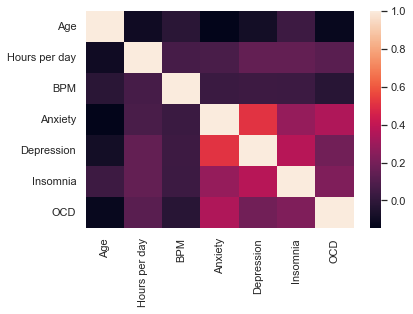

In [23]:
sns.heatmap(data.corr())

In [24]:
miss_bpm

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
10,8/27/2022 22:51,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,...,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect,I understand.
12,8/27/2022 23:04,25.0,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,...,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.
15,8/27/2022 23:19,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,...,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen,I understand.
30,8/28/2022 10:30,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,...,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve,I understand.
32,8/28/2022 10:54,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,...,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,9/24/2022 0:42,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,...,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect,I understand.
700,10/3/2022 10:00,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,...,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen,I understand.
706,10/3/2022 15:38,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,...,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve,I understand.
712,10/4/2022 8:53,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,...,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve,I understand.


In [25]:
miss_bpm['Fav genre'].unique()

array(['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap'], dtype=object)

In [26]:
df = data.copy()

<AxesSubplot:xlabel='Age', ylabel='Count'>

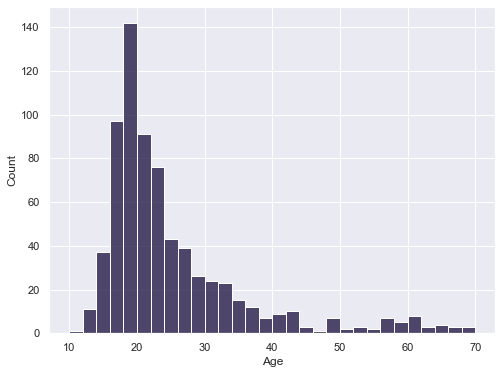

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(data['Age'])

In [28]:
data.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


<AxesSubplot:xlabel='Primary streaming service', ylabel='count'>

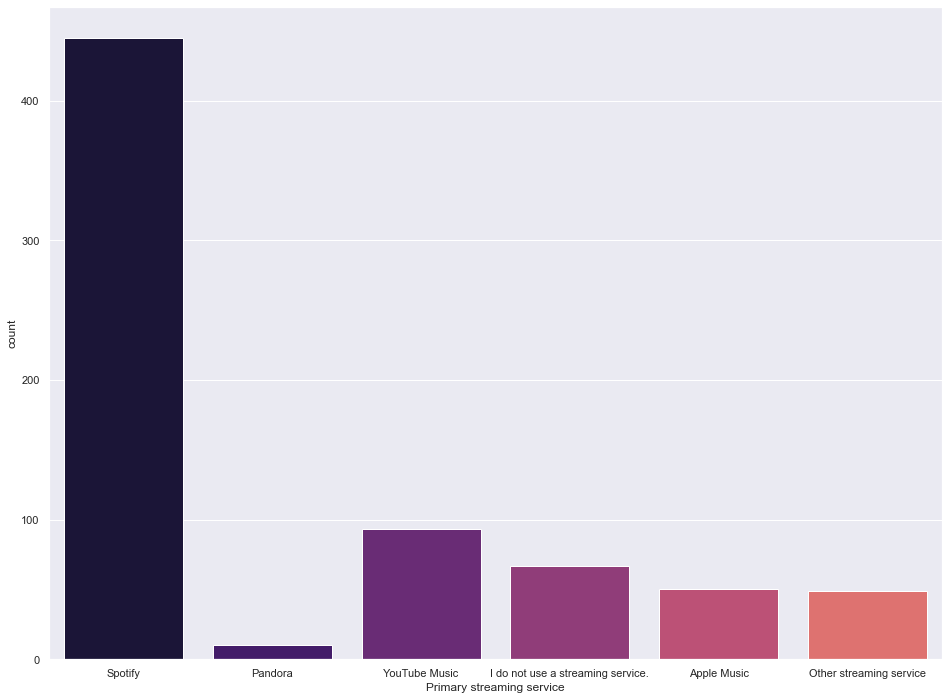

In [34]:
plt.figure(figsize=(16,12))
sns.countplot(data['Primary streaming service'])

<AxesSubplot:xlabel='Hours per day', ylabel='Count'>

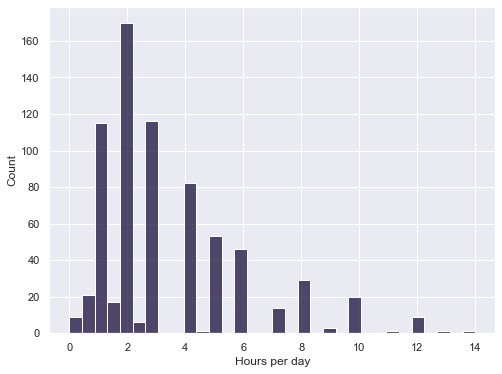

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(data['Hours per day'])

<AxesSubplot:xlabel='While working', ylabel='count'>

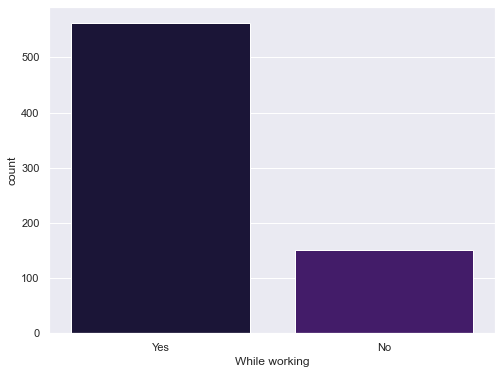

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(data['While working'])

Text(0.5, 0, 'Classical Music')

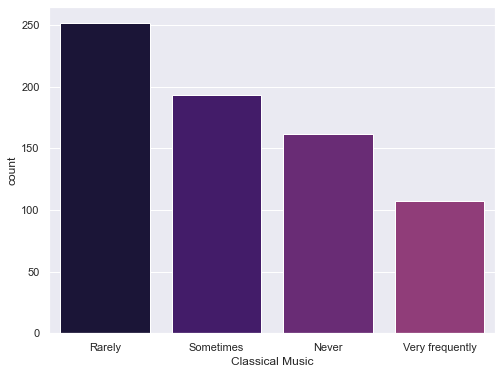

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Classical]'])
plt.xlabel('Classical Music')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           714 non-null    float64
 1   Primary streaming service     714 non-null    object 
 2   Hours per day                 714 non-null    float64
 3   While working                 714 non-null    object 
 4   Instrumentalist               714 non-null    object 
 5   Composer                      714 non-null    object 
 6   Fav genre                     714 non-null    object 
 7   Exploratory                   714 non-null    object 
 8   Foreign languages             714 non-null    object 
 9   BPM                           609 non-null    float64
 10  Frequency [Classical]         714 non-null    object 
 11  Frequency [Country]           714 non-null    object 
 12  Frequency [EDM]               714 non-null    object 
 13  Frequ

Text(0.5, 0, 'Video game music')

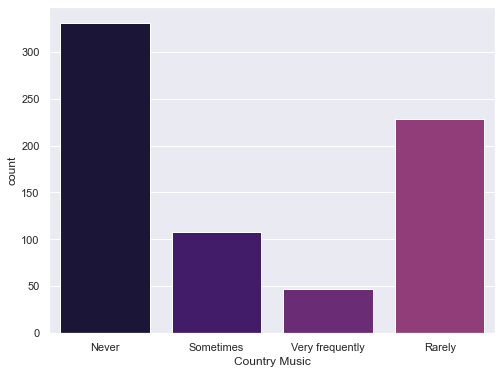

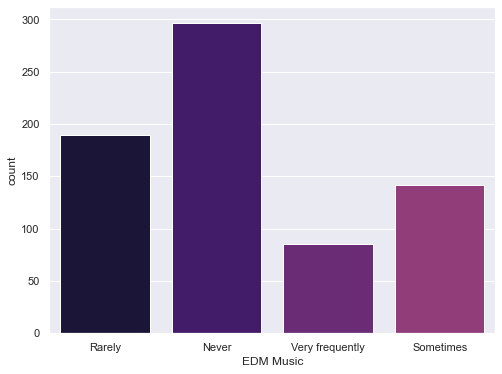

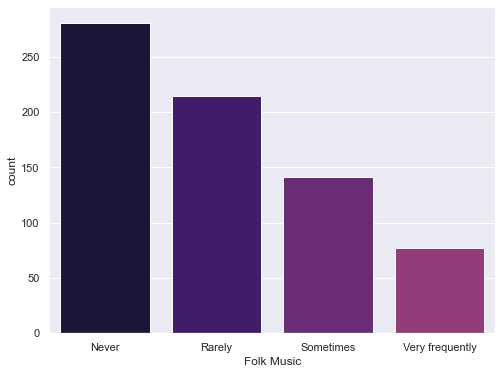

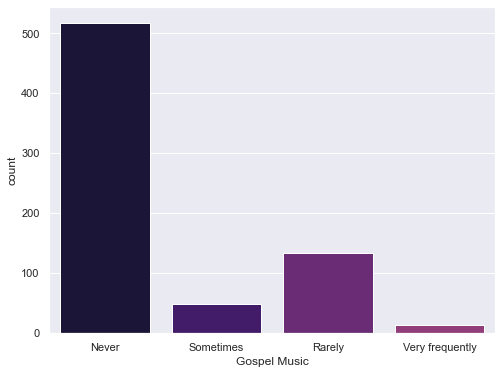

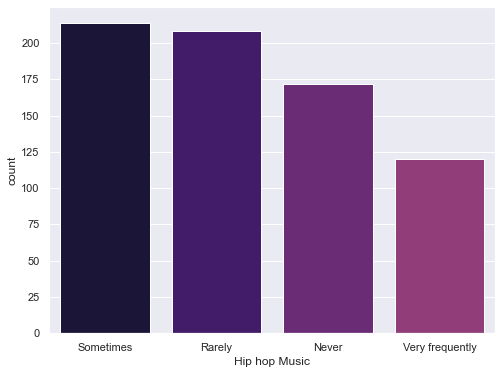

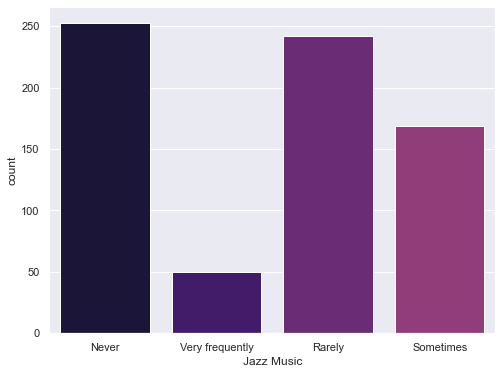

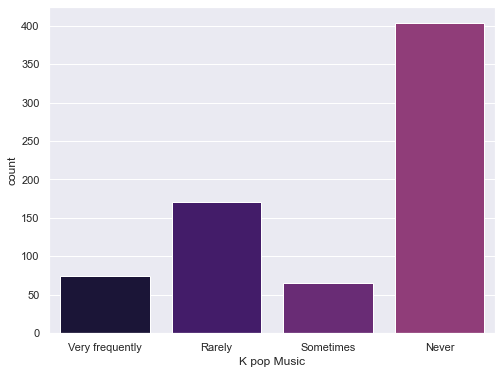

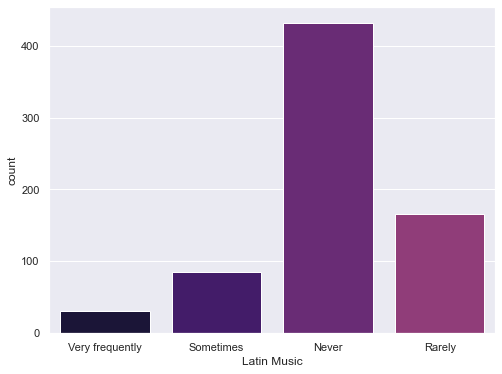

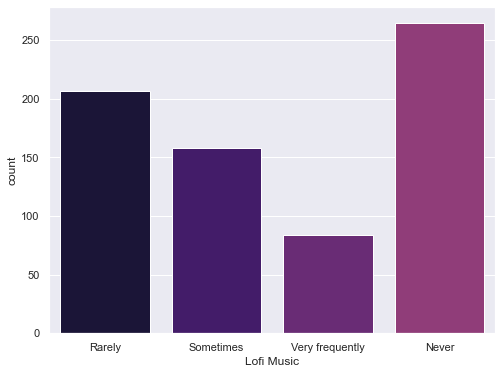

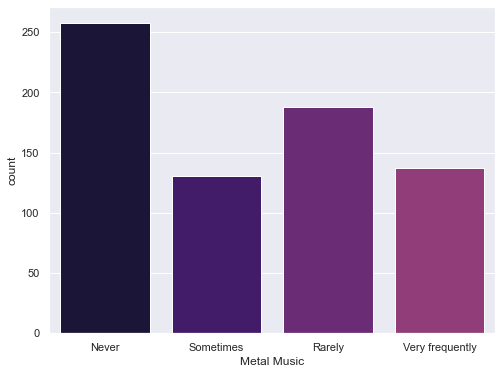

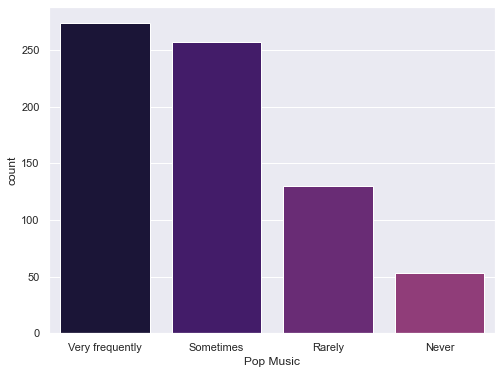

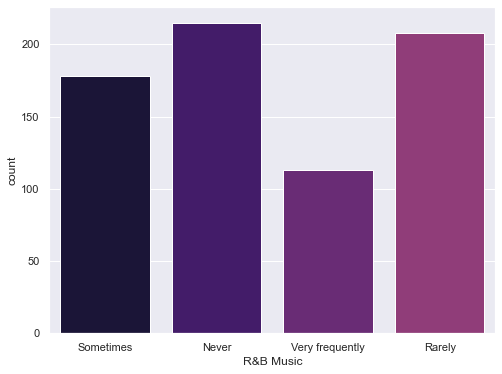

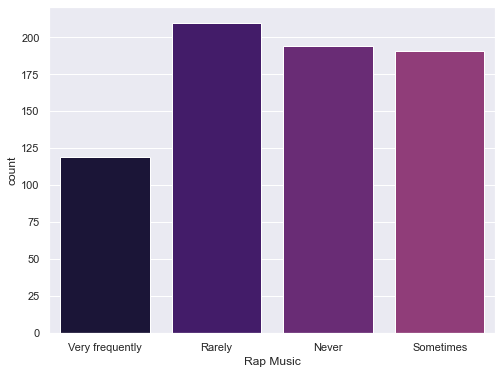

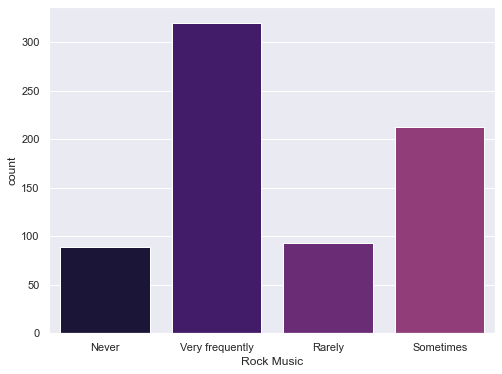

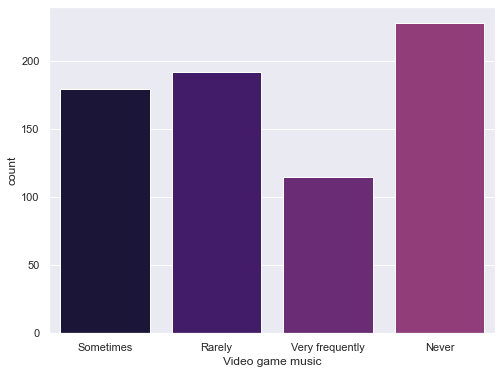

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Country]'])
plt.xlabel('Country Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [EDM]'])
plt.xlabel('EDM Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Folk]'])
plt.xlabel('Folk Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Gospel]'])
plt.xlabel('Gospel Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data ['Frequency [Hip hop]'])
plt.xlabel('Hip hop Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Jazz]'])
plt.xlabel('Jazz Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [K pop]'])
plt.xlabel('K pop Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Latin]'])
plt.xlabel('Latin Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Lofi]'])
plt.xlabel('Lofi Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Metal]'])
plt.xlabel('Metal Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Pop]'])
plt.xlabel('Pop Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [R&B]'])
plt.xlabel('R&B Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data ['Frequency [Rap]'])
plt.xlabel('Rap Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Rock]'])
plt.xlabel('Rock Music')
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Video game music]'])
plt.xlabel('Video game music')


In [49]:
#BIVARIATE ANALYSIS

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

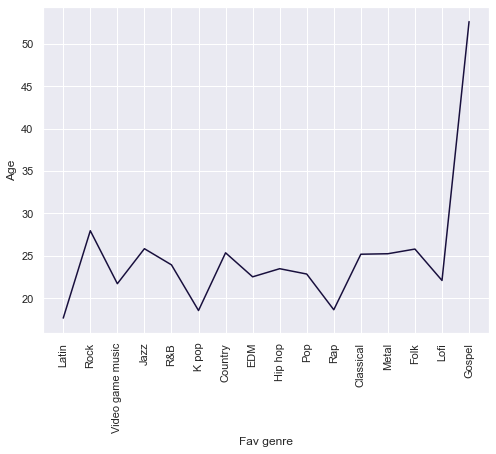

In [50]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data['Fav genre'], y=data['Age'], ci=None)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

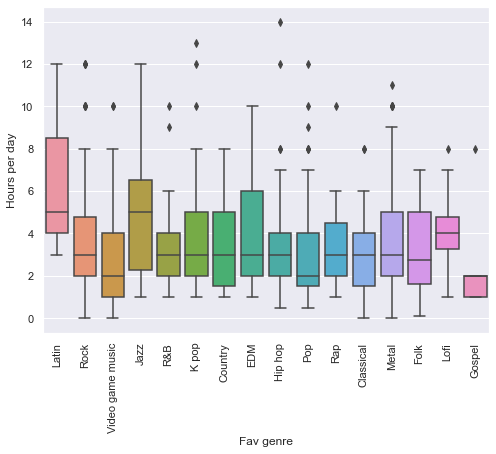

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Fav genre'], y=data['Hours per day'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

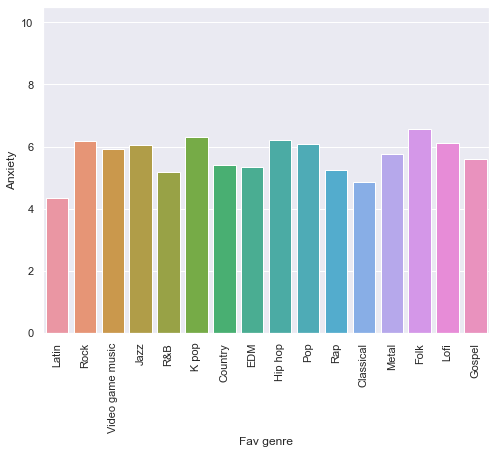

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Anxiety'],errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

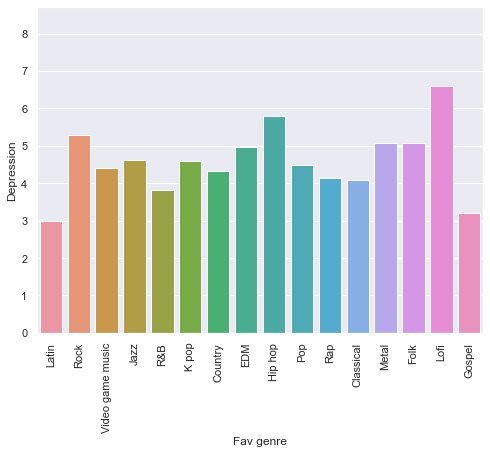

In [55]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Depression'], errwidth=0)
plt.xticks(rotation=90)

<Figure size 576x432 with 0 Axes>

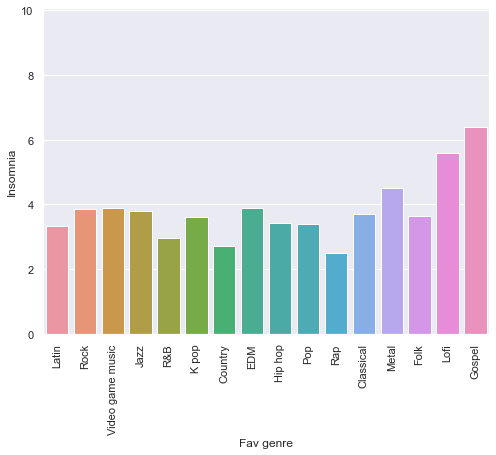

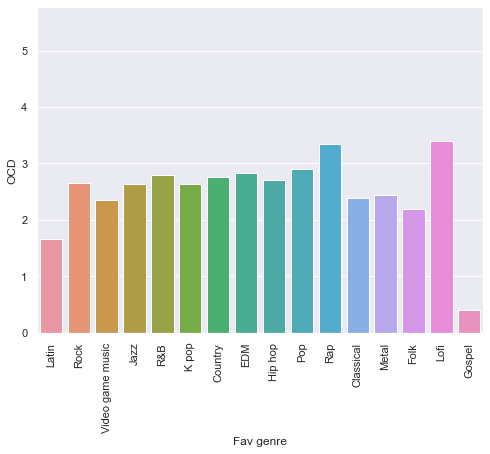

<Figure size 576x432 with 0 Axes>

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Insomnia'], errwidth=0)
plt.xticks(rotation=90)
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['OCD'], errwidth=0)
plt.xticks(rotation=90)
plt.figure(figsize=(8,6))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

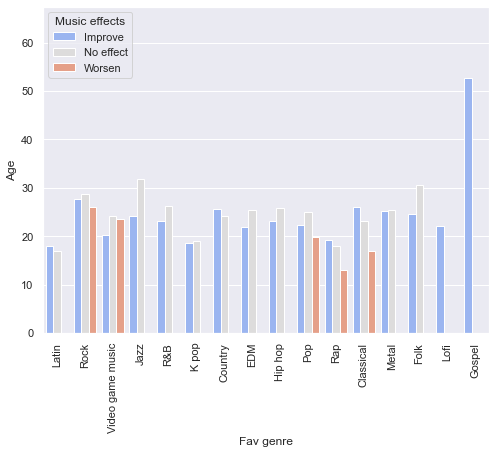

In [59]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Age'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

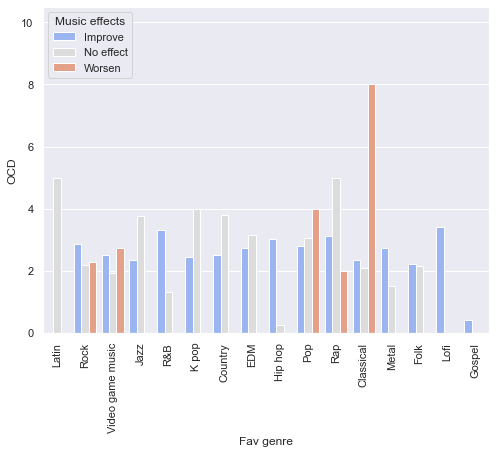

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['OCD'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

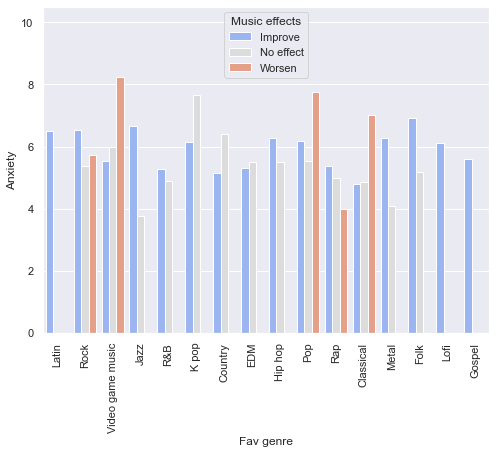

In [61]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Anxiety'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

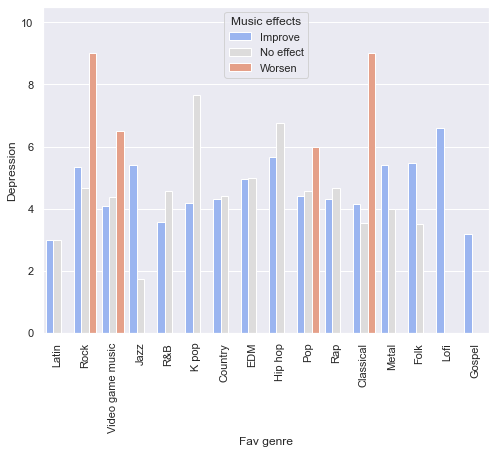

In [62]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Depression'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

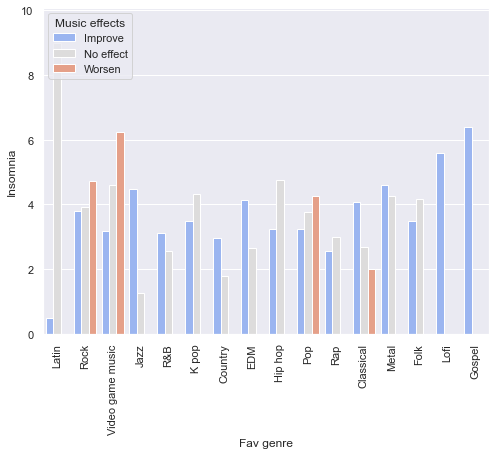

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Insomnia'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

In [1]:
from turtle import *
bgcolor("yellow")
color("red")
begin_fill()
pensize(3)
left(50)
forward(133)
circle(50,200)
forward(133)
end_fill()